# 8. Type I and type II neuron models

***8.1. Exercise: Probing Type I and Type II neuron models***

This exercise deals not only with Python functions, but with python objects. The classes NeuronX and NeuronY both are neurons, that have different dynamics: one is Type I and one is Type II. Finding out which class implements which dynamics is the goal of the exercise.

The types get randomly assigned each time you load the module or you call the function neurons.neurontype_random_reassignment().

In [3]:
# %matplotlib inline
''' import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

I_min_X = 1.02

# create an input current
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_X*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor_X = a_neuron_of_type_X.run(input_current, 1300*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor_X, title="Neuron of Type X")    

I_min_Y = 1.32
# create an input current
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_Y*b2.pA)

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor_Y = a_neuron_of_type_Y.run(input_current, 1300*b2.ms)
neurons.plot_data(state_monitor_Y, title="Neuron of Type Y")
'''


' import brian2 as b2\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom neurodynex3.tools import input_factory, plot_tools, spike_tools\nfrom neurodynex3.neuron_type import neurons\n\nI_min_X = 1.02\n\n# create an input current\ninput_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_X*b2.pA)\n\n# get one instance of class NeuronX and save that object in the variable \'a_neuron_of_type_X\'\na_neuron_of_type_X = neurons.NeuronX()  # we do not know if it\'s type I or II\n# simulate it and get the state variables\nstate_monitor_X = a_neuron_of_type_X.run(input_current, 1300*b2.ms)\n# plot state vs. time\nneurons.plot_data(state_monitor_X, title="Neuron of Type X")    \n\nI_min_Y = 1.32\n# create an input current\ninput_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_Y*b2.pA)\n\n# get an instance of class NeuronY\na_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it\'s type I or II\nstate_monitor_Y = a_neuron_of_type_Y.run(input_curr

***8.1.1. Question: Estimating the threshold***

*What is the threshold current for repetitive firing for NeuronX and NeuronY?*

*Exploring various values of I_amp, find the range in which the threshold occurs, to a precision of 0.01.*

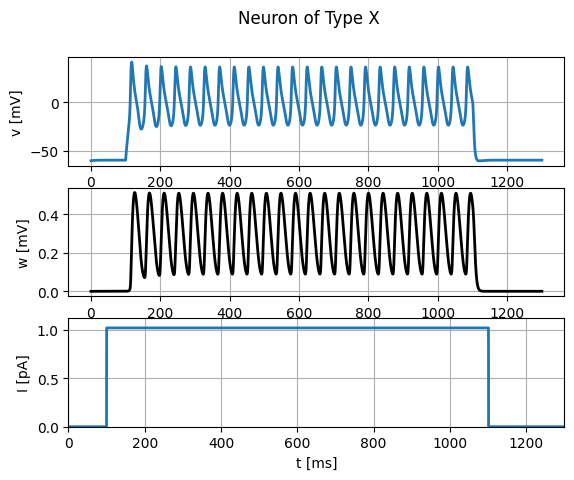

[0.1131 0.1558 0.1982 0.2404 0.2825 0.3246 0.3667 0.4087 0.4508 0.4928
 0.5349 0.5769 0.619  0.661  0.7031 0.7451 0.7872 0.8292 0.8713 0.9133
 0.9554 0.9974 1.0395 1.0815] s
<class 'brian2.units.fundamentalunits.Quantity'>
Firing Rate: 23.75 Hz


In [4]:
# %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons


I_min_X = 1.02

input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_X*b2.pA)

a_neuron_of_type_X = neurons.NeuronX() 

state_monitor_X = a_neuron_of_type_X.run(input_current, 1300*b2.ms)

neurons.plot_data(state_monitor_X, title="Neuron of Type X")    

spike_threshold = 0 * b2.mV
spike_times = spike_tools.get_spike_time(state_monitor_X, spike_threshold)
print(spike_times)
print(type(spike_times))  # it's a Quantity

st = spike_times
isi = st[1:] - st[:-1]  # Inter-spike intervals using the indexing idiom
mean_isi = np.mean(isi)  # Mean of ISIs
firing_rate = 1.0 / mean_isi  # Firing rate in 1/ms
firing_rate_hz = firing_rate / b2.Hz  # Convert to Hz
print("Firing Rate: {:.2f} Hz".format(firing_rate_hz))

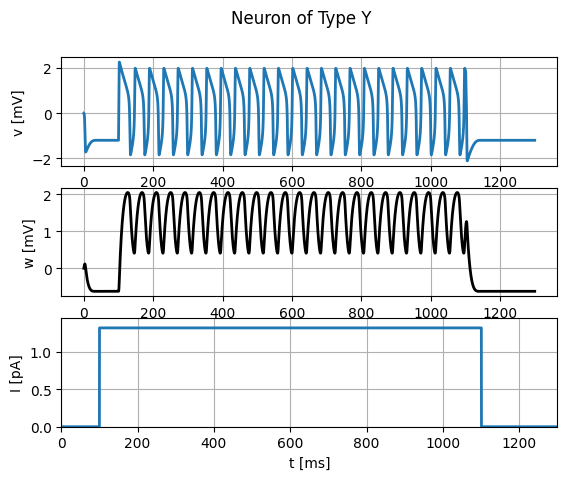

[0.1009 0.146  0.1873 0.2286 0.2699 0.3112 0.3525 0.3938 0.4351 0.4764
 0.5177 0.559  0.6003 0.6416 0.6829 0.7242 0.7655 0.8068 0.8481 0.8894
 0.9307 0.972  1.0133 1.0546 1.0959] s
<class 'brian2.units.fundamentalunits.Quantity'>
Firing Rate: 24.12 Hz


In [5]:
# %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons


I_min_Y = 1.32

input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_Y*b2.pA)

a_neuron_of_type_Y = neurons.NeuronY() 

state_monitor_Y = a_neuron_of_type_Y.run(input_current, 1300*b2.ms)

neurons.plot_data(state_monitor_Y, title="Neuron of Type Y")    

spike_threshold = 0 * b2.mV
spike_times = spike_tools.get_spike_time(state_monitor_Y, spike_threshold)
print(spike_times)
print(type(spike_times))  # it's a Quantity

st = spike_times
isi = st[1:] - st[:-1]  # Inter-spike intervals using the indexing idiom
mean_isi = np.mean(isi)  # Mean of ISIs
firing_rate = 1.0 / mean_isi  # Firing rate in 1/ms
firing_rate_hz = firing_rate / b2.Hz  # Convert to Hz
print("Firing Rate: {:.2f} Hz".format(firing_rate_hz))

***8.2. Exercise: f-I curves***

*Write a new function that calculates an estimate of the firing rate.*

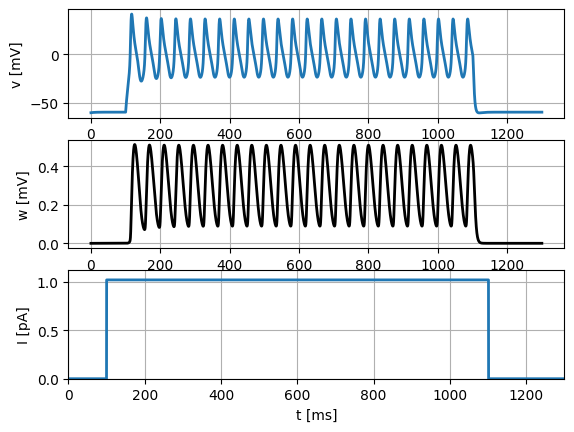

[0.1131 0.1558 0.1982 0.2404 0.2825 0.3246 0.3667 0.4087 0.4508 0.4928
 0.5349 0.5769 0.619  0.661  0.7031 0.7451 0.7872 0.8292 0.8713 0.9133
 0.9554 0.9974 1.0395 1.0815] s
<class 'brian2.units.fundamentalunits.Quantity'>
Firing Rate: 23.75 Hz


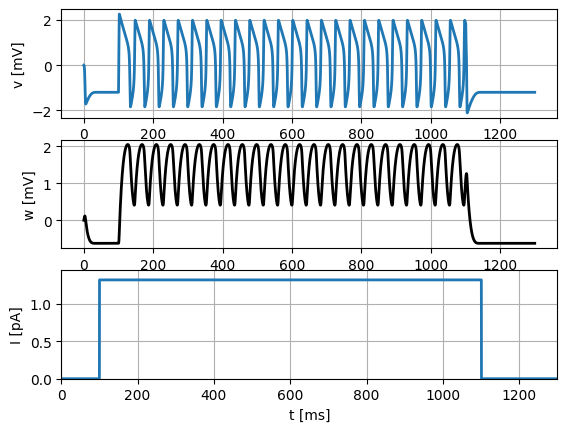

[0.1009 0.146  0.1873 0.2286 0.2699 0.3112 0.3525 0.3938 0.4351 0.4764
 0.5177 0.559  0.6003 0.6416 0.6829 0.7242 0.7655 0.8068 0.8481 0.8894
 0.9307 0.972  1.0133 1.0546 1.0959] s
<class 'brian2.units.fundamentalunits.Quantity'>
Firing Rate: 24.12 Hz


24.12060302 * hertz

In [6]:
# %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

def get_firing_rate(neuron, input_current, spike_threshold):
    state_monitor = neuron.run(input_current, 1300*b2.ms)
    neurons.plot_data(state_monitor) 
    spike_times = spike_tools.get_spike_time(state_monitor, spike_threshold)
    print(spike_times)
    print(type(spike_times))  # it's a Quantity

    st = spike_times
    isi = st[1:] - st[:-1]  # Inter-spike intervals using the indexing idiom
    mean_isi = np.mean(isi)  # Mean of ISIs
    firing_rate = 1.0 / mean_isi  # Firing rate in 1/ms
    firing_rate_hz = firing_rate / b2.Hz  # Convert to Hz
    print("Firing Rate: {:.2f} Hz".format(firing_rate_hz))
    print(neuron)
    
    return firing_rate

# Firing rate neuronX
I_min_X = 1.02

input_current_X = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_X*b2.pA)

spike_threshold_X = spike_threshold_Y = 0 * b2.mV

get_firing_rate(neurons.NeuronX(), input_current_X, spike_threshold_X) 


# Firing rate neuronY

I_min_Y = 1.32

input_current_Y = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_min_Y*b2.pA)

get_firing_rate(neurons.NeuronY(), input_current_Y, spike_threshold_Y) 

*Plot the f-I curve*

NeuronY


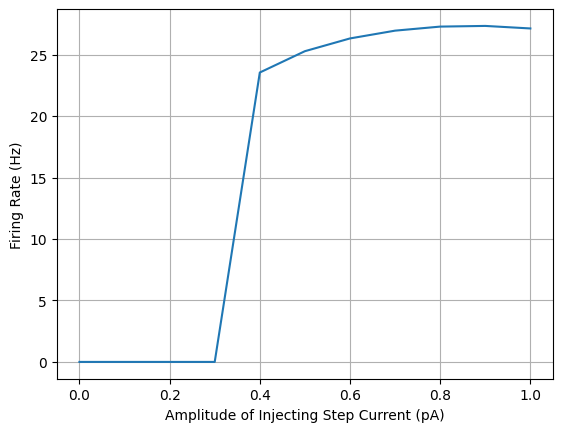

NeuronX


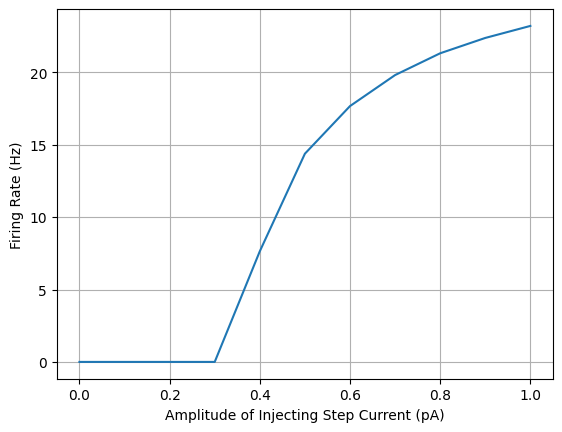

In [7]:
# %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons


def get_firing_rate(neuron_class, current_amplitude, spike_threshold):
    """Calculate the firing rate of a neuron given a current amplitude."""
    neuron = neuron_class()

    input_current = input_factory.get_step_current(
        100, 1100, 1 * b2.ms, current_amplitude * b2.pA
    )

    state_monitor = neuron.run(input_current, 1300 * b2.ms)

    spike_times = spike_tools.get_spike_time(state_monitor, spike_threshold)

    if len(spike_times) > 1:
        isi = spike_times[1:] - spike_times[:-1] 
        mean_isi = np.mean(isi)
        firing_rate = 1.0 / mean_isi  
        return firing_rate / b2.Hz  
    else:
        return 0.0  


def plot_fI_curve(NeuronClass):
    """Plot the f-I curve for a given neuron class."""
    plt.figure() 

    I = np.arange(0.0, 1.1, 0.1) 
    f = []

    for I_amp in I:
        firing_rate = get_firing_rate(NeuronClass, I_amp, 0 * b2.mV) 
        f.append(firing_rate)

    plt.plot(I, f)
    plt.xlabel('Amplitude of Injecting Step Current (pA)')
    plt.ylabel('Firing Rate (Hz)')
    plt.grid()
    plt.show()

print("NeuronY")
plot_fI_curve(neurons.NeuronY)


print("NeuronX")
plot_fI_curve(neurons.NeuronX)



In [8]:
print("a_neuron_of_type_X is : {}".format(a_neuron_of_type_X.get_neuron_type()))
print("a_neuron_of_type_Y is : {}".format(a_neuron_of_type_Y.get_neuron_type()))

a_neuron_of_type_X is : Type I
a_neuron_of_type_Y is : Type II


Type I neurons have a continuous FI curve. Type II models have a discontinuous FI curve. 

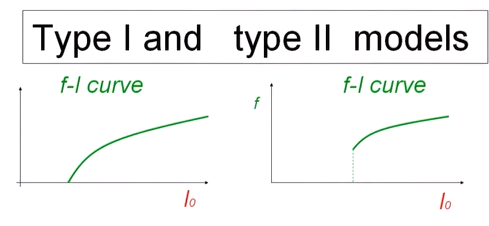

Reducing the HH model to a 2D model (du/dt; dw/dt) allows for better graphical analysis by means of phase plane analysis:

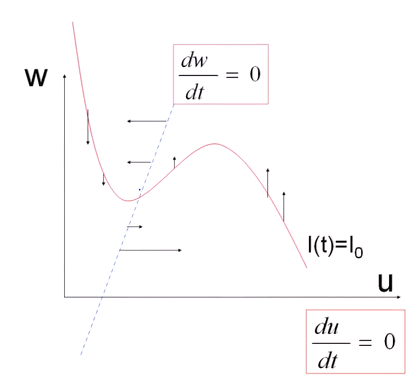

Type II neuron: 

By injecting a constant input current, the u-nullclines move up and the fixed point (crossing of nullclines) changes. 

If the fixed point remains stable, we obtain damped oscillations. After some critical value I_c, the fixed point becomes unstable; a limit cycle can form, corresponding to repetitive firing of the neuron. 

Hopf bifurcation: transition from stable fixed point to an unstable fixed point, leading to a limit cycle --> leading to repetitive firing at a *finite* frequency; hence the discontinuous FI curve for a type II neuron model. 


Type I neuron: 

A saddle fixed point (or saddle point) is a type of equilibrium point in a dynamical system that is unstable in some directions but stable in others. It plays an important role in the saddle-node bifurcation that governs the excitability of Type 1 neurons.

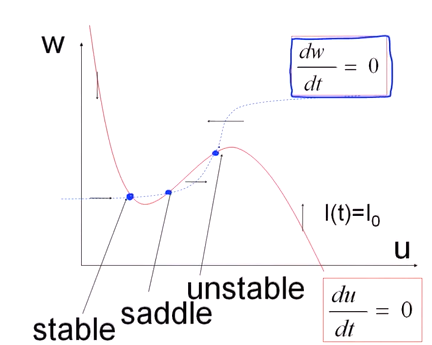

After applying a constant stimulus and shifting the u-nullcline upwards, the fixed points disappear. 

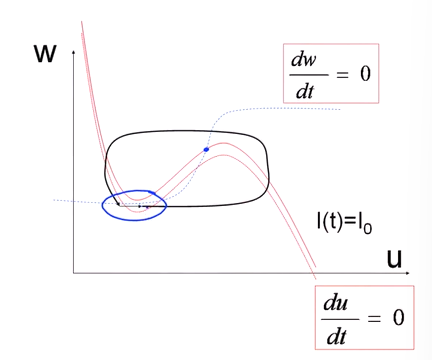

However, the "ruins" of the fixed points still remain (blue circle); here, the flow is slow. Therefore, the frequency of the limit cycle is small right at the bifurcation point and we obtain a continuous FI curve of a type I neuron.

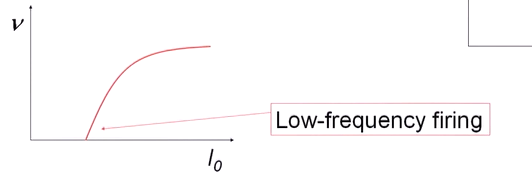

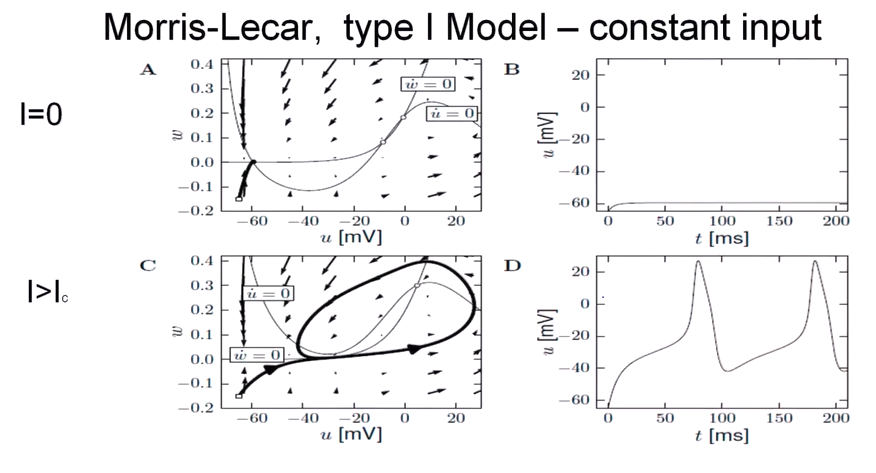
